# YOLOv8 demo - fine-tuning

In [ ]:
# Install YOLOv8
%pip install ultralytics
%pip install opencv-python

In [3]:
# Import YOLOv8
from ultralytics import YOLO

# Import image visualization
import cv2

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Move data to datasets folder that YOLOv8 expects
!rm -rf ./ai-demos
!rm -rf ./datasets
!git clone https://github.com/tkubica12/ai-demos
!mv -f ./ai-demos/yolo/datasets .

## Transfer learning
Here we will take pretrained weights as starting point and continue training with our own dataset. We have just very few examples to train on yet due to tranfer learning we good results fairly quickly (with a just a few iterations = cheaply).

Best for similar cases of new objects in similar general context.

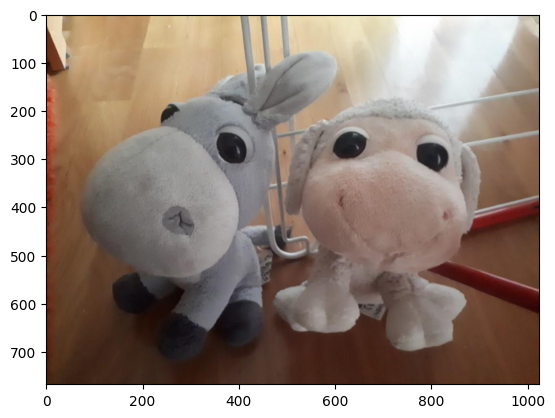

In [9]:
# Show one image from dataset
%matplotlib inline
from matplotlib import pyplot as plt
img = cv2.imread("./datasets/2plysaci/train/images/20181209_093257_jpg.rf.9e5de39c501d75369ffa14627baaa318.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
# Load pretrained weights, use yolov8n, yolov8s or yolov8l as examples
model = YOLO('yolov8n.pt')

In [16]:
# Freeze layers via callback
def freeze_layer(trainer):
    model = trainer.model
    num_freeze = 10
    print(f"Freezing {num_freeze} layers")
    freeze = [f'model.{x}.' for x in range(num_freeze)]  # layers to freeze 
    for k, v in model.named_parameters(): 
        v.requires_grad = True  # train all layers 
        if any(x in k for x in freeze): 
            print(f'freezing {k}') 
            v.requires_grad = False 
    print(f"{num_freeze} layers are freezed.")

# Uncomment to freeze layers
# model.add_callback("on_train_start", freeze_layer)

In [ ]:
# Train the model
train = model.train(data='./datasets/2plysaci.yaml', epochs=100, imgsz=1024)

In [25]:
# Find folder with latest run of training
import os

files = os.listdir("runs/detect/")
max_number = 0
latest_run = ""
for file in files:
    if file.split("train")[1]:
        number = int(file.split("train")[1])
        max_number = max(max_number, number)
if max_number == 0:
    latest_run = "runs/detect/train"
else:
    latest_run = "runs/detect/train" + str(max_number)
print(latest_run)

runs/detect/train21


In [ ]:
# Test sample 1
best_model = YOLO(f"{latest_run}/weights/best.pt")
results = best_model("./datasets/2plysaci/test/20181209_092837.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))

In [ ]:
# Generic picture - we expect no objects to be found
results = best_model("./test2017/000000284881.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))